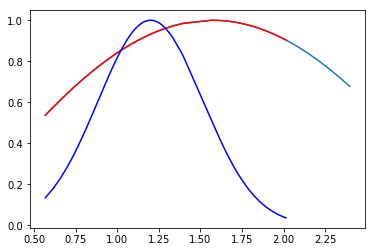

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import math

boston = load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
target = pd.DataFrame(boston.target,columns=['target'])
data=pd.concat([features,target],axis=1)
x=data['RM']
x1=sorted(np.array(x/x.mean()))
x=x1+[i+1 for i in x1]
y=np.sin(x)
plt.plot(x,y)
n=int(0.8*len(x))
x_train=x[:n]
y_train=y[:n]
x_test=x[n:]
y_test=y[n:]
w=np.exp([-(1.2-i)**2/(2*0.1) for i in x_train])
plt.plot(x_train,y_train,'r')
plt.plot(x_train,w,'b')
def h(x,a,b):
    return a*x+b
def error(a,x,b,y,w):
    e=0
    m=len(x)
    for i in range(m):
        e+=np.power(h(x[i],a,b)-y[i],2)*w[i]
    return (1/(2*m))*e

error: 0.06614137226206705---a:1.8600662368042573,b:-0.7962243178421666
error: 0.018312489887152176---a:1.3533605603913987,b:-0.620673567323427
error: 0.011422762970211438---a:1.1032234861838663,b:-0.3475908149085799
error: 0.007176247674245257---a:0.9068452261130027,b:-0.1331983025076317
error: 0.00455888817999083---a:0.752672074634729,b:0.03511752470395232
error: 0.0029456664570710676---a:0.6316334187867482,b:0.16725934893397798
error: 0.0019513497294632823---a:0.5366080783236878,b:0.2710015934995398
error: 0.0013384979802249575---a:0.46200533867114607,b:0.35244782273250447
error: 0.0009607639482851541---a:0.40343602719545096,b:0.41638983867834684
error: 0.0007279458172072355---a:0.35745428091222153,b:0.466589601659683


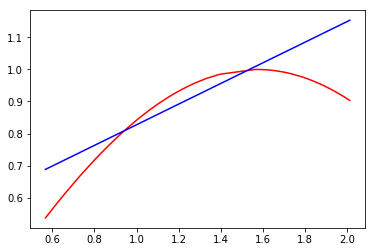

In [11]:
def step_gradient(a,x,b,y,l_rate,w):
    grad_a=0
    grad_b=0
    m=len(x)
    for i in range(m):
        grad_a+=(2/m)*((h(x[i],a,b)-y[i])*x[i])*w[i]
        grad_b+=(2/m)*(h(x[i],a,b)-y[i])*w[i]
    a=a-(grad_a*l_rate)
    b=b-(grad_b*l_rate)
    return a,b
def descend(initial_a,initial_b,x,y,l_rate,iterations,w):
    a=initial_a
    b=initial_b
    for i in range(iterations):
        e=error(a,x,b,y,w)
        if i%1000==0:
            print("error: "+str(e)+"---a:"+str(a)+",b:"+str(b))
        a,b = step_gradient(a,x,b,y,l_rate,w)
    return a,b
a=1.8600662368042573
b=-0.7962243178421666
l_rate=0.01
iterations=10000
final_a,final_b=descend(a,b,x_train,y_train,l_rate,iterations,w)
H=[i*final_a+final_b for i in x_train]
plt.plot(x_train,y_train,'r',x_train,H,'b')